In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


These libraries are essential for data handling, visualization, modeling, and evaluation.
fetch_california_housing: loads dataset.
train_test_split: splits data into training and testing sets.
LinearRegression: builds prediction model.
mean_squared_error, r2_score: evaluate model performance.

In [5]:
# Step 2: Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


This loads the California housing dataset directly from Scikit-learn.
df.head() shows the first few rows.

In [7]:
# Step 3: EDA
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

df.info(): Gives data types and non-null counts.
df.describe(): Gives statistical summary (mean, std, min, max, etc.)
df.isnull().sum(): Checks for missing values.

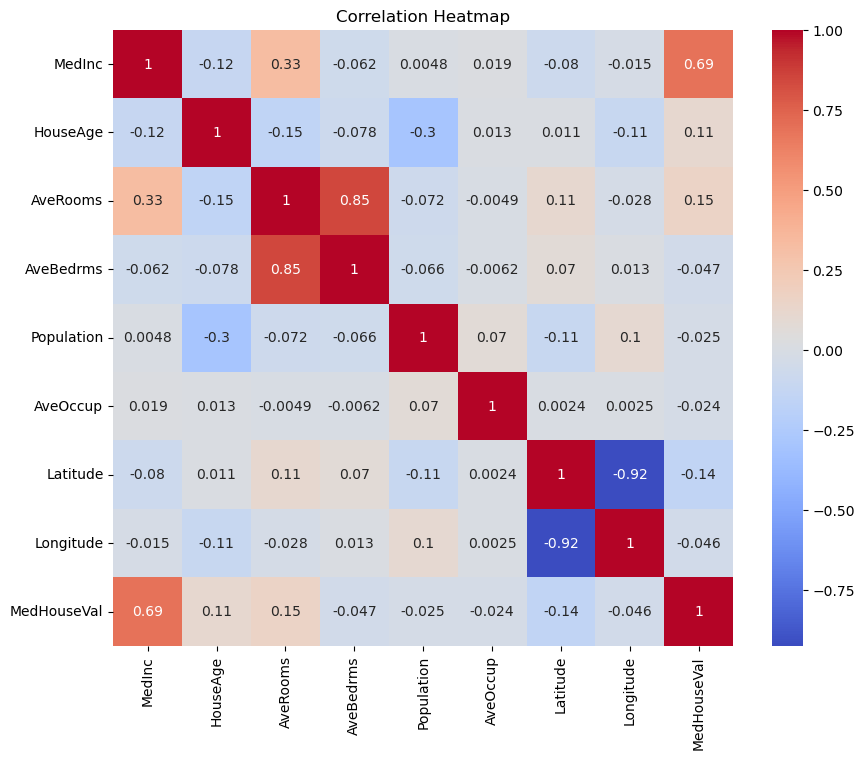

In [9]:
# Step 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The heatmap shows that median income (MedInc) has the strongest positive correlation (+0.69) with housing prices, while most other features have weak or no linear correlation, helping identify which features are most relevant for predicting house values.

In [11]:
# Step 5: Feature Selection
X = df.drop("MedHouseVal", axis=1)  # Target column is 'MedHouseVal'
y = df["MedHouseVal"]


MSE: 0.5558915986952441
R2 Score: 0.575787706032451


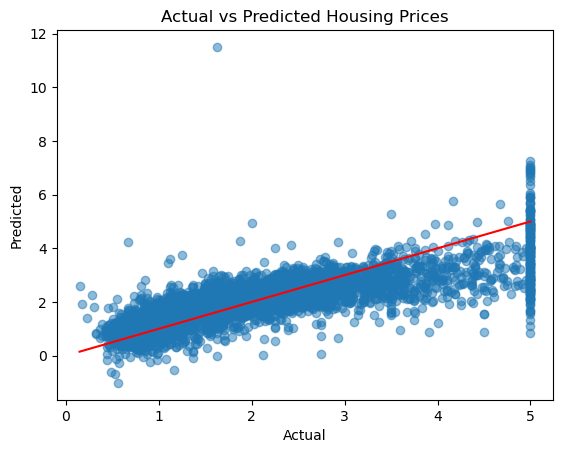

In [13]:
# Step 6–9: Train, Predict, Evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Scatter Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


This plot compares actual vs predicted housing prices, showing that while the model captures the general trend (indicated by the red reference line), many predictions deviate from actual values, especially at the high end (where prices are capped at 5.0), and the R² score of 0.5758 indicates moderate predictive performance for a basic linear regression model.